# Visualization of single cell RNA-seq

In this part, we will introduce the tutorial of special plot of `omicverse`.

In [1]:
import omicverse as ov
import scanpy as sc
#import scvelo as scv
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.6, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


We utilized single-cell RNA-seq data (GEO accession: GSE95753) obtained from the dentate gyrus of the hippocampus in mouse.

In [2]:
adata = ov.read('data/DentateGyrus/10X43_1.h5ad')
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

## Optimizing color mapping

Visualizing spatially resolved biological data with appropriate color mapping can significantly facilitate the exploration of underlying patterns and heterogeneity. Spaco (spatial colorization) provides a spatially constrained approach that generates discriminate color assignments for visualizing single-cell spatial data in various scenarios.

Jing Z, Zhu Q, Li L, Xie Y, Wu X, Fang Q, et al. [Spaco: A comprehensive tool for coloring spatial data at single-cell resolution.](https://doi.org/10.1016/j.patter.2023.100915) Patterns. 2024;100915


**Function**: `ov.pl.optim_palette`: 
- adata: the datasets of scRNA-seq
- basis: he position on the plane should be set to `X_spatial` in spatial RNA-seq, `X_umap`,`X_tsne`,`X_mde` in scRNA-seq and should not be set to `X_pca`
- colors: Specify the colour to be optimised, which should be for one of the columns in adata.obs, noting that it should have the colour first, and that we can use ov.pl.embedding to colour the cell types. If there is no colour then colour blind optimisation colour will be used.
- palette: You can also re-specify the colour bar that needs to be drawn, just set `palette=['#FFFFFF','#000000']`, we have prepared `ov.pl.red_color`,`ov.pl.blue_color`,`ov.pl.green_color`,`ov.pl.orange_color`, by default.

In [ ]:
optim_palette=ov.pl.optim_palette(adata,basis='X_umap',colors='clusters')

Text(0.5, 1.0, 'Cell Type of DentateGyrus')

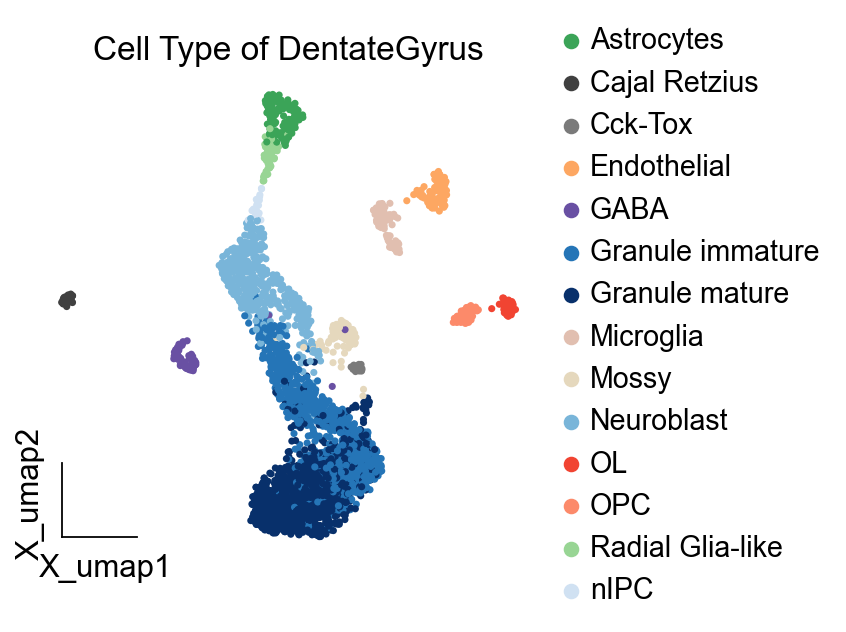

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (4,4))
ov.pl.embedding(adata,
                basis='X_umap',
               color='clusters',
               frameon='small',
               show=False,
               palette=optim_palette,
               ax=ax,)
plt.title('Cell Type of DentateGyrus',fontsize=15)

<AxesSubplot: title={'center': 'age(days)'}, xlabel='X_umap1', ylabel='X_umap2'>

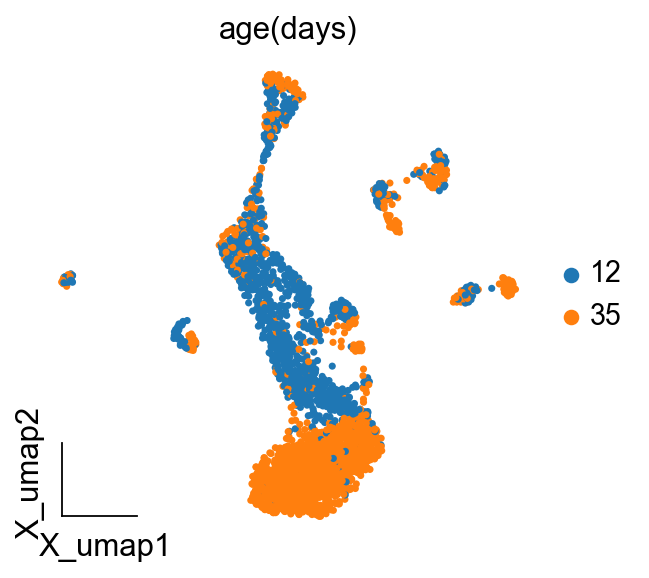

In [5]:
ov.pl.embedding(adata,
                basis='X_umap',
               color='age(days)',
               frameon='small',
               show=False,)

## Stacked histogram of cell proportions

This is a graph that appears widely in various CNS-level journals, and is limited to the fact that `scanpy` does not have a proper way of plotting it, and we provide `ov.pl.cellproportion` for plotting it here.

**Function**: `ov.pl.cellproportion`: 
- adata: the datasets of scRNA-seq
- celltype_clusters: Specify the colour to plot, which should be for one of the columns in adata.obs, noting that it should have the colour first, and that we can use ov.pl.embedding to colour the cell types. If there is no colour then colour blind optimisation colour will be used.
- groupby: The group variable for the different groups of cell types we need to display, in this case we are displaying different ages, so we set it to `age(days)`
- groupby_li: If there are too many groups, we can also select the ones we are interested in plotting, here we use groupby_li to plot the groups
- figsize: If we specify axes, then this variable can be left empty
- legend: Whether to show a legend

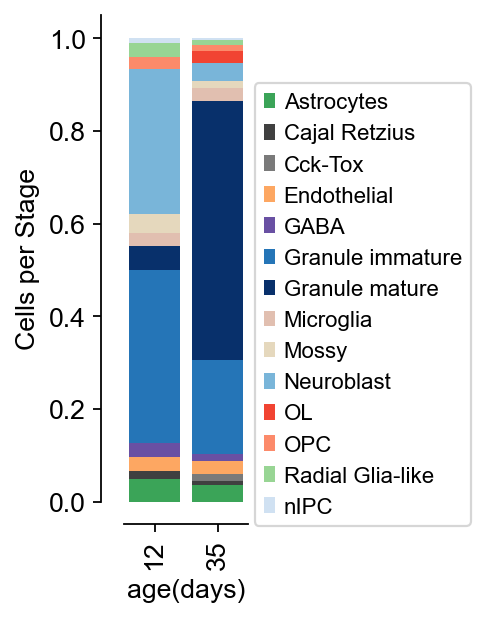

In [6]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (1,4))
ov.pl.cellproportion(adata=adata,celltype_clusters='clusters',
                    groupby='age(days)',legend=True,ax=ax)

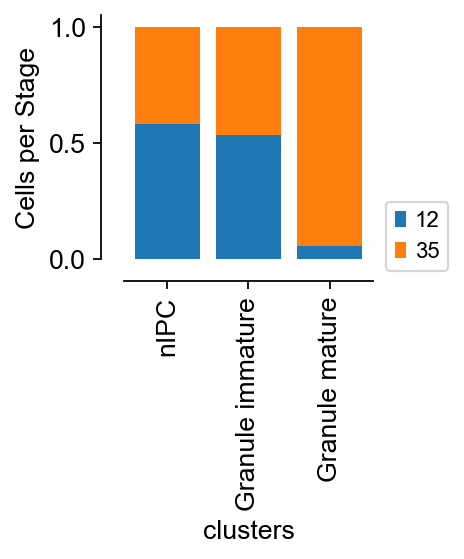

In [7]:
fig,ax=plt.subplots(figsize = (2,2))
ov.pl.cellproportion(adata=adata,celltype_clusters='age(days)',
                    groupby='clusters',groupby_li=['nIPC','Granule immature','Granule mature'],
                     legend=True,ax=ax)

If you are interested in the changes in cell types in different groups, we recommend using a stacked area graph.

age(days)_colors


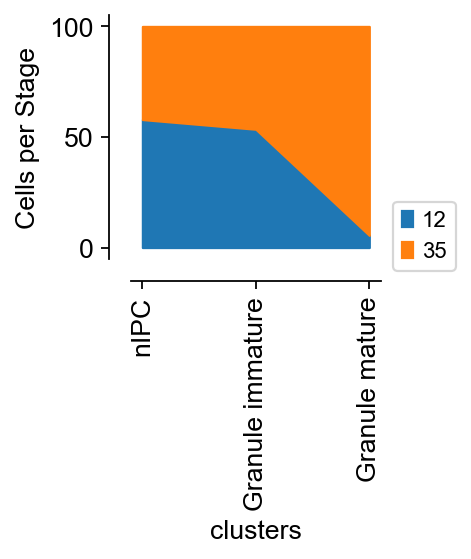

In [8]:
fig,ax=plt.subplots(figsize = (2,2))
ov.pl.cellstackarea(adata=adata,celltype_clusters='age(days)',
                    groupby='clusters',groupby_li=['nIPC','Granule immature','Granule mature'],
                     legend=True,ax=ax)

## A collection of some interesting embedded plot

Our first presentation is an embedding map with the number and proportion of cell types. This graph visualises the low-dimensional representation of cells in addition to the number of cell proportions, etc. It should be noted that the cell proportions plotted on the left side may be distorted when there are too many cell types, and we would be grateful if anyone would be interested in fixing this bug.

**Function**: `ov.pl.embedding_celltype`: 
- adata: the datasets of scRNA-seq
- figsize: Note that we don't usually provide the ax parameter for combinatorial graphs, this is due to the fact that combinatorial graphs are made up of multiple axes, so the figsize parameter is more important, here we set it to `figsize=(7,4)`.
- basis: he position on the plane should be set to `X_spatial` in spatial RNA-seq, `X_umap`,`X_tsne`,`X_mde` in scRNA-seq and should not be set to `X_pca`
- celltype_key: Specify the colour to be optimised, which should be for one of the columns in adata.obs, noting that it should have the colour first, and that we can use ov.pl.embedding to colour the cell types. If there is no colour then colour blind optimisation colour will be used.
- title: Note that the space entered in title is used to control the position.
- celltype_range: Since our number of cell types is different in each data, we want to have the flexibility to control where the cell scale plot is drawn, here we set it to `(1,10)`. You can also tweak the observations yourself to find the parameter that best suits your data.
- embedding_range: As with the positional parameters of the cell types, they need to be adjusted several times on their own for optimal results.

(<Figure size 560x320 with 2 Axes>,
 [<AxesSubplot: xlabel='X_umap1', ylabel='X_umap2'>, <AxesSubplot: >])

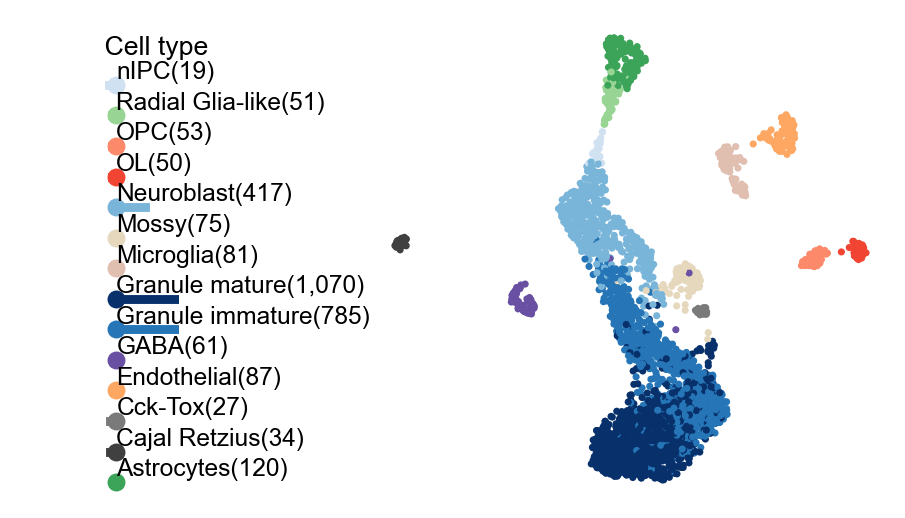

In [9]:
ov.pl.embedding_celltype(adata,figsize=(7,4),basis='X_umap',
                            celltype_key='clusters',
                            title='            Cell type',
                            celltype_range=(1,10),
                            embedding_range=(4,10),)

Sometimes we want to be able to circle a certain type of cell that we are interested in, and here we use convex polygons to achieve this, while the shape of the convex polygons may be optimised in future versions.

**Function**: `ov.pl.ConvexHull`: 
- adata: the datasets of scRNA-seq
- basis: he position on the plane should be set to `X_spatial` in spatial RNA-seq, `X_umap`,`X_tsne`,`X_mde` in scRNA-seq and should not be set to `X_pca`
- cluster_key: Specify the celltype to be optimised, which should be for one of the columns in adata.obs, noting that it should have the colour first, and that we can use ov.pl.embedding to colour the cell types. If there is no colour then colour blind optimisation colour will be used.
- hull_cluster: the target celltype to be circled.

clusters_colors


<AxesSubplot: title={'center': 'clusters'}, xlabel='X_umap1', ylabel='X_umap2'>

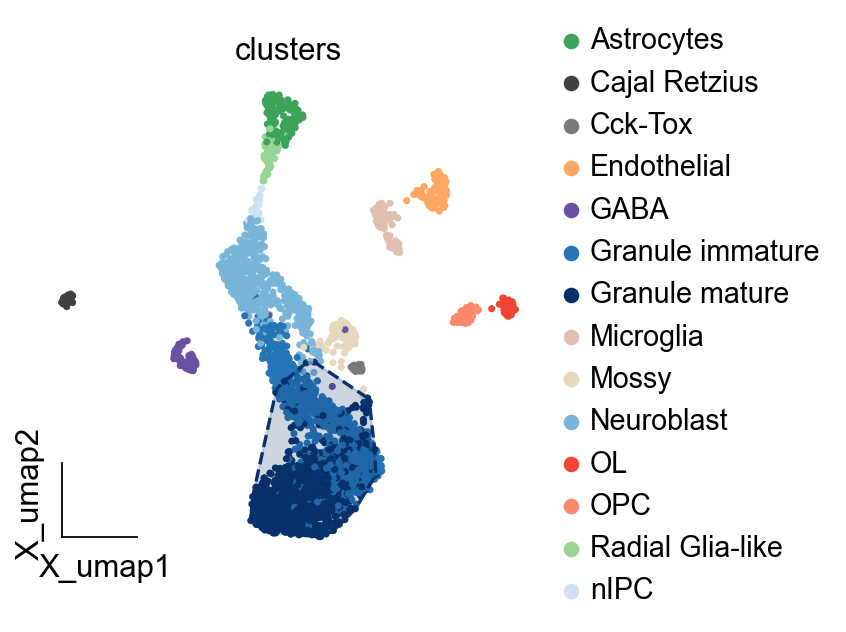

In [10]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (4,4))

ov.pl.embedding(adata,
                basis='X_umap',
                color=['clusters'],
                frameon='small',
                show=False,
                ax=ax)

ov.pl.ConvexHull(adata,
                basis='X_umap',
                cluster_key='clusters',
                hull_cluster='Granule mature',
                ax=ax)


Besides, if you don't want to plot convexhull, you can plot the contour instead. 

**Function**: `ov.pl.contour`: 
- adata: the datasets of scRNA-seq
- basis: he position on the plane should be set to `X_spatial` in spatial RNA-seq, `X_umap`,`X_tsne`,`X_mde` in scRNA-seq and should not be set to `X_pca`
- groupby: Specify the celltype to be optimised, which should be for one of the columns in adata.obs, noting that it should have the colour first, and that we can use ov.pl.embedding to colour the cell types. If there is no colour then colour blind optimisation colour will be used.
- clusters: the target celltype to be circled. 
- colors: the color of the contour
- linestyles: the linestyles of the contour
- **kwargs: more kwargs could be found from `plt.contour`

<AxesSubplot: title={'center': 'clusters'}, xlabel='X_umap1', ylabel='X_umap2'>

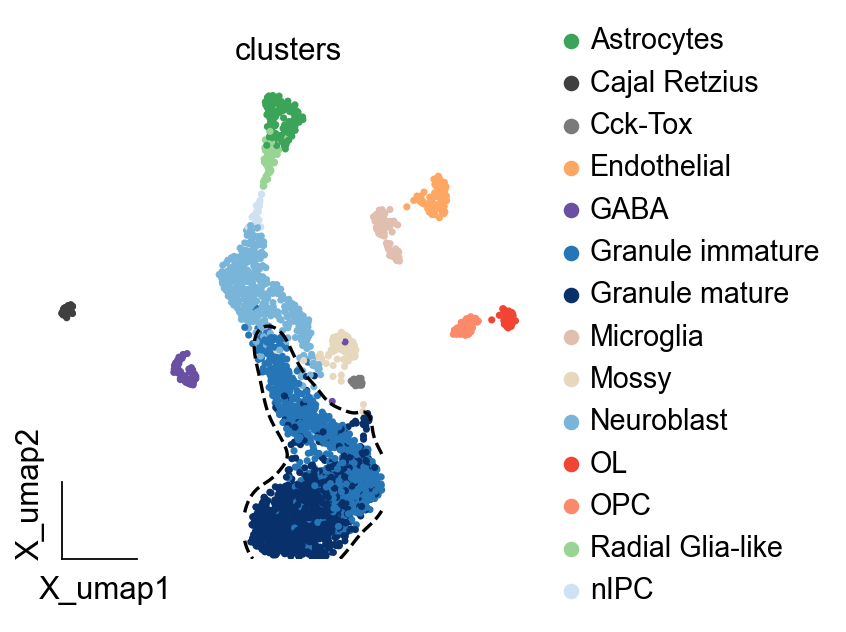

In [11]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (4,4))

ov.pl.embedding(adata,
                basis='X_umap',
                color=['clusters'],
                frameon='small',
                show=False,
                ax=ax)

ov.pl.contour(ax=ax,adata=adata,groupby='clusters',clusters=['Granule immature','Granule mature'],
       basis='X_umap',contour_threshold=0.1,colors='#000000',
        linestyles='dashed',)


In scanpy's default `embedding` plotting function, when we set legend=True, legend masking may occur. To solve this problem, we introduced `ov.pl.embedding_adjust` in omicverse to automatically adjust the position of the legend.

**Function**: `ov.pl.embedding_adjust`: 
- adata: the datasets of scRNA-seq
- basis: he position on the plane should be set to `X_spatial` in spatial RNA-seq, `X_umap`,`X_tsne`,`X_mde` in scRNA-seq and should not be set to `X_pca`
- groupby: Specify the celltype to be optimised, which should be for one of the columns in adata.obs, noting that it should have the colour first, and that we can use ov.pl.embedding to colour the cell types. If there is no colour then colour blind optimisation colour will be used.
- exclude: We can specify which cell types are not to be plotted, in this case we set it to `OL`
- adjust_kwargs: We can manually specify the parameters of [adjustText](https://adjusttext.readthedocs.io/en/latest/), the specific parameters see the documentation of adjustText, it should be noted that we have to use dict to specify the parameters here.
- text_kwargs: We can also specify the font colour manually by specifying the [text_kwargs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) parameter

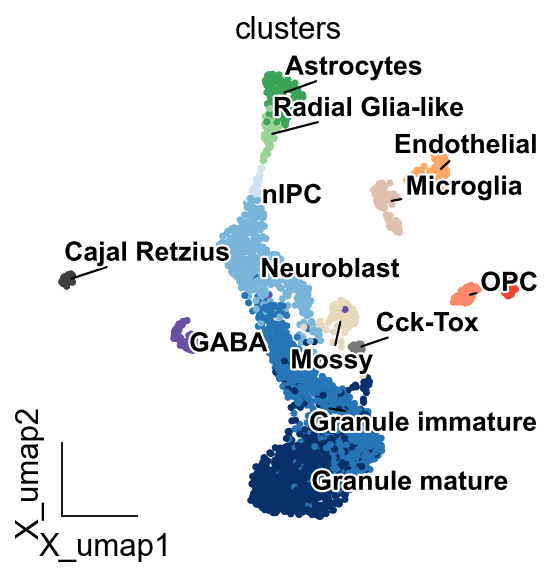

In [12]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(adata,
                  basis='X_umap',
                  color=['clusters'],
                   show=False, legend_loc=None, add_outline=False, 
                   frameon='small',legend_fontoutline=2,ax=ax
                 )

ov.pl.embedding_adjust(
    adata,
    groupby='clusters',
    exclude=("OL",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

Sometimes we are interested in the distribution density of a certain class of cell types in a categorical variable, which is cumbersome to plot in the `scanpy` implementation, so we have simplified the implementation in omicverse and ensured the same plotting.

**Function**: `ov.pl.embedding_density`: 
- adata: the datasets of scRNA-seq
- basis: he position on the plane should be set to `X_spatial` in spatial RNA-seq, `X_umap`,`X_tsne`,`X_mde` in scRNA-seq and should not be set to `X_pca`
- groupby: Specify the celltype to be optimised, which should be for one of the columns in adata.obs, noting that it should have the colour first, and that we can use ov.pl.embedding to colour the cell types. If there is no colour then colour blind optimisation colour will be used.
- target_clusters: We can specify which cell types are to be plotted, in this case we set it to `Granule mature`
- kwargs: other parameter can be found in `scanpy.pl.embedding`

computing density on 'umap'
--> added
    'temp_density', densities (adata.obs)
    'temp_density_params', parameter (adata.uns)


<AxesSubplot: title={'center': 'Granule mature'}, xlabel='X_umap1', ylabel='X_umap2'>

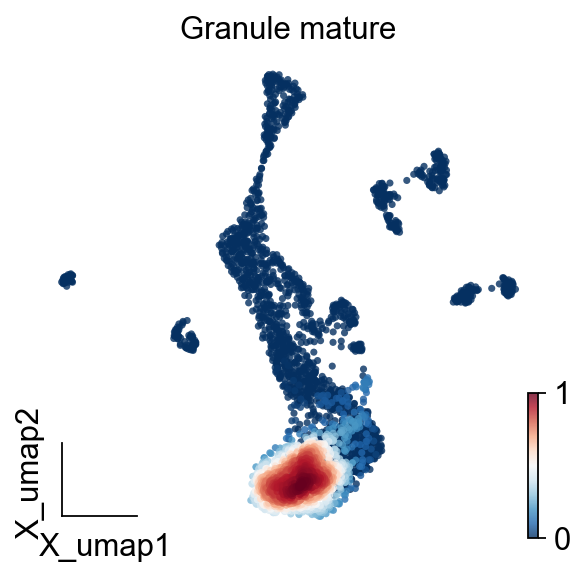

In [13]:
ov.pl.embedding_density(adata,
                 basis='X_umap',
                 groupby='clusters',
                 target_clusters='Granule mature',
                 frameon='small',
                show=False,cmap='RdBu_r',alpha=0.8)

## Bar graph with overlapping dots (Bar-dot) plot

In biological research, bardotplot plots are the most common class of graphs we use, but unfortunately, there is no direct implementation of plotting functions in either matplotlib, seaborn or scanpy. To compensate for this, we implement bardotplot plotting in omicverse and provide manual addition of p-values (it should be noted that manual addition refers to the manual addition of p-values for model fitting rather than making up p-values yourself).

In [14]:
ov.single.geneset_aucell(adata,
                            geneset_name='Sox',
                            geneset=['Sox17', 'Sox4', 'Sox7', 'Sox18', 'Sox5'])

ctxcore have been install version: 0.2.0


<AxesSubplot: title={'center': 'Sox4'}, xlabel='X_umap1', ylabel='X_umap2'>

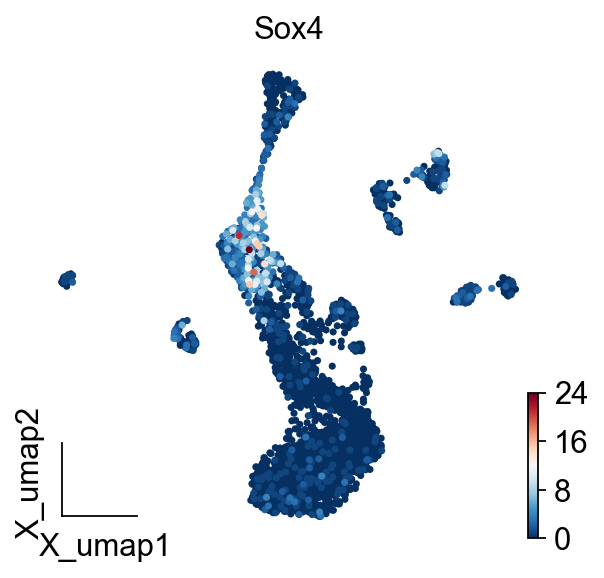

In [15]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['Sox4'],
                frameon='small',
                show=False,)

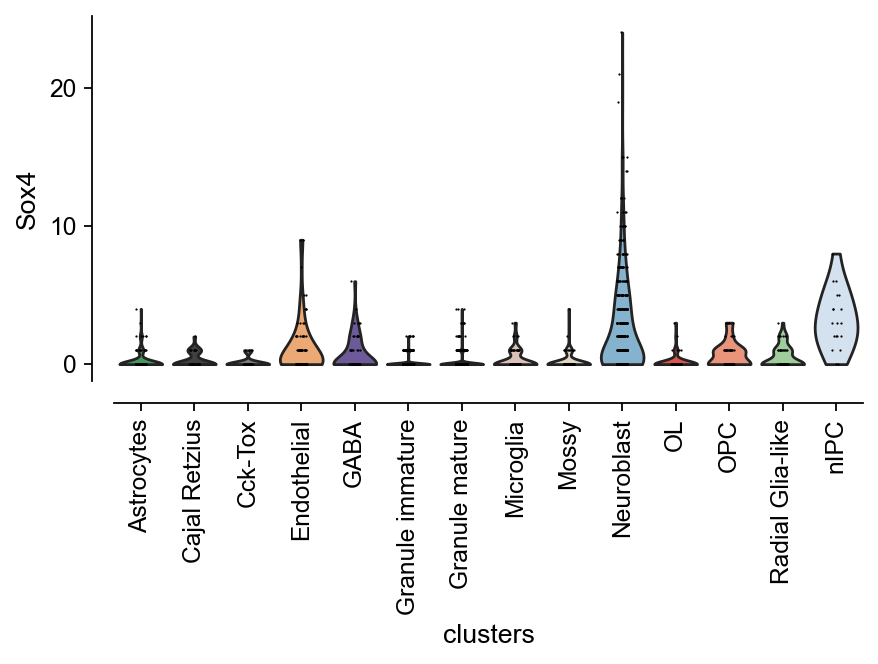

In [18]:
ov.pl.violin(adata,keys='Sox4',groupby='clusters',figsize=(6,3))

**Function**: `ov.pl.embedding_density`: 
- adata: the datasets of scRNA-seq
- groupby: Specify the celltype to be optimised, which should be for one of the columns in adata.obs, noting that it should have the colour first, and that we can use ov.pl.embedding to colour the cell types. If there is no colour then colour blind optimisation colour will be used.
- color: The size of the variable to be plotted, which can be a gene, stored in adata.var, or a cell value, stored in adata.obs.
- bar_kwargs: We provide the parameters of the barplot for input, see the matplotlib documentation for more [details](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)
- scatter_kwargs: We also provide the parameters of the scatter for input, see the matplotlib documentation for more [details](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

**Function**: `ov.pl.add_palue`: 
- ax: the axes of bardotplot
- line_x1: The left side of the p-value line to be plotted
- line_x2: The right side of the p-value line to be plotted|
- line_y: The height of the p-value line to be plotted
- text_y: How much above the p-value line is plotted text
- text: the text of p-value, you can set `***` to instead `p<0.001`
- fontsize: the fontsize of text
- fontcolor: the color of text
- horizontalalignment: the location of text

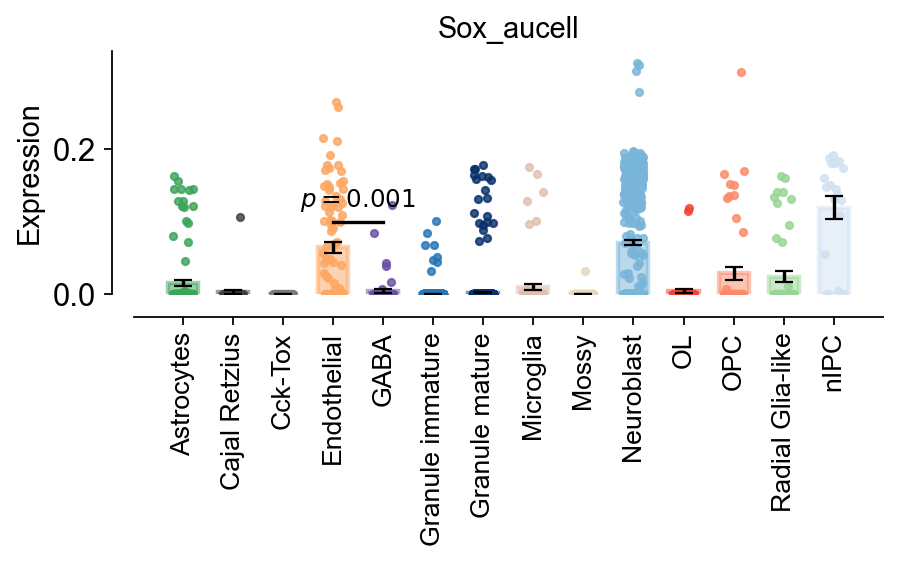

In [19]:
fig, ax = plt.subplots(figsize=(6,2))
ov.pl.bardotplot(adata,groupby='clusters',color='Sox_aucell',figsize=(6,2),
           ax=ax,
          ylabel='Expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})

ov.pl.add_palue(ax,line_x1=3,line_x2=4,line_y=0.1,
          text_y=0.02,
          text='$p={}$'.format(round(0.001,3)),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)

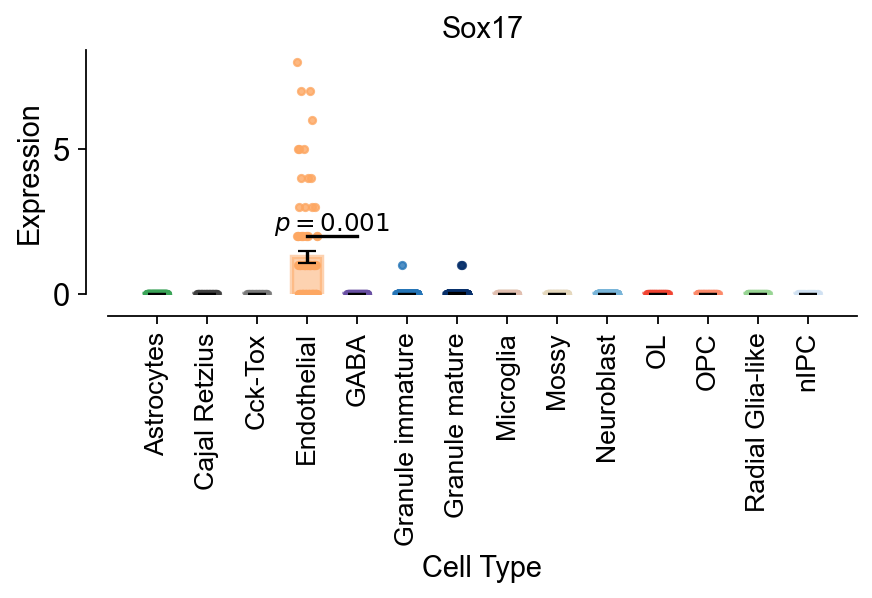

In [20]:
fig, ax = plt.subplots(figsize=(6,2))
ov.pl.bardotplot(adata,groupby='clusters',color='Sox17',figsize=(6,2),
           ax=ax,
          ylabel='Expression',xlabel='Cell Type',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})

ov.pl.add_palue(ax,line_x1=3,line_x2=4,line_y=2,
          text_y=0.2,
          text='$p={}$'.format(round(0.001,3)),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)

## Boxplot with jitter points 
A box plot, also known as a box-and-whisker plot, is a graphical representation used to display the distribution and summary statistics of a dataset. It provides a concise and visual way to understand the central tendency, spread, and potential outliers in the data.

**Function**: `ov.pl.single_group_boxplot`: 
 
- adata (AnnData object): The data object containing the information for plotting. 
- groupby (str): The variable used for grouping the data
- color (str): The variable used for coloring the data points.
- type_color_dict (dict): A dictionary mapping group categories to specific colors.  
- scatter_kwargs (dict): Additional keyword arguments for customizing the scatter plot.  
- ax (matplotlib.axes.Axes): A pre-existing axes object for plotting (optional).  (optional).(optional).
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Astrocytes'),
  Text(1, 0, 'Cajal Retzius'),
  Text(2, 0, 'Cck-Tox'),
  Text(3, 0, 'Endothelial'),
  Text(4, 0, 'GABA'),
  Text(5, 0, 'Granule immature'),
  Text(6, 0, 'Granule mature'),
  Text(7, 0, 'Microglia'),
  Text(8, 0, 'Mossy'),
  Text(9, 0, 'Neuroblast'),
  Text(10, 0, 'OL'),
  Text(11, 0, 'OPC'),
  Text(12, 0, 'Radial Glia-like'),
  Text(13, 0, 'nIPC')])

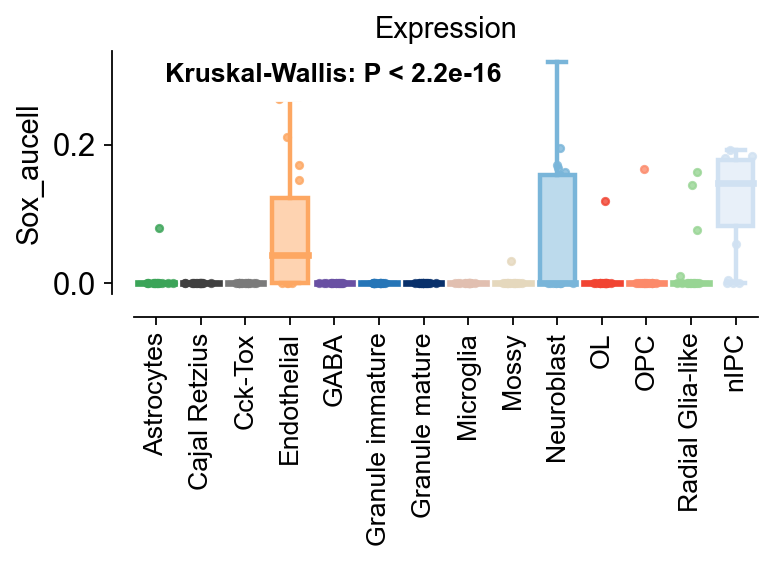

In [21]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')

ov.pl.single_group_boxplot(adata,groupby='clusters',
             color='Sox_aucell',
             type_color_dict=dict(zip(pd.Categorical(adata.obs['clusters']).categories, adata.uns['clusters_colors'])),
             x_ticks_plot=True,
             figsize=(5,2),
             kruskal_test=True,
             ylabel='Sox_aucell',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Expression',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=False,
             save=False,
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)

## Complexheatmap

A complex heatmap, also known as a clustered heatmap, is a data visualization technique used to represent complex relationships and patterns in multivariate data. It combines several elements, including clustering, color mapping, and hierarchical organization, to provide a comprehensive view of data across multiple dimensions. 

**Function**: `ov.pl.single_group_boxplot`: 
 
- adata (AnnData): Annotated data object containing single-cell RNA-seq data.
- groupby (str, optional): Grouping variable for the heatmap. Default is ''.
- figsize (tuple, optional): Figure size. Default is (6, 10).
- layer (str, optional): Data layer to use. Default is None.
- use_raw (bool, optional): Whether to use the raw data. Default is False.
- var_names (list or None, optional): List of genes to include in the heatmap. Default is None.
- gene_symbols (None, optional): Not used in the function.
- standard_scale (str, optional): Method for standardizing values. Options: 'obs', 'var', None. Default is None.
- col_color_bars (dict, optional): Dictionary mapping columns types to colors.
- col_color_labels (dict, optional): Dictionary mapping column labels to colors.
- left_color_bars (dict, optional): Dictionary mapping left types to colors.
- left_color_labels (dict, optional): Dictionary mapping left labels to colors.
- right_color_bars (dict, optional): Dictionary mapping right types to colors.
- right_color_labels (dict, optional): Dictionary mapping right labels to colors.
- marker_genes_dict (dict, optional): Dictionary mapping cell types to marker genes.
- index_name (str, optional): Name for the index column in the melted DataFrame. Default is ''.
- value_name (str, optional): Name for the value column in the melted DataFrame. Default is ''.
- cmap (str, optional): Colormap for the heatmap. Default is 'parula'.
- xlabel (str, optional): X-axis label. Default is ''.
- ylabel (str, optional): Y-axis label. Default is ''.
- label (str, optional): Label for the plot. Default is ''.
- save (bool, optional): Whether to save the plot. Default is False.
- save_pathway (str, optional): File path for saving the plot. Default is ''.
- legend_gap (int, optional): Gap between legend items. Default is 7.
- legend_hpad (int, optional): Horizontal space between the heatmap and legend, default is 2 [mm].
- show (bool, optional): Whether to display the plot. Default is False.

    

PyComplexHeatmap have been install version: 1.7.6
All dependencies are satisfied.
Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations


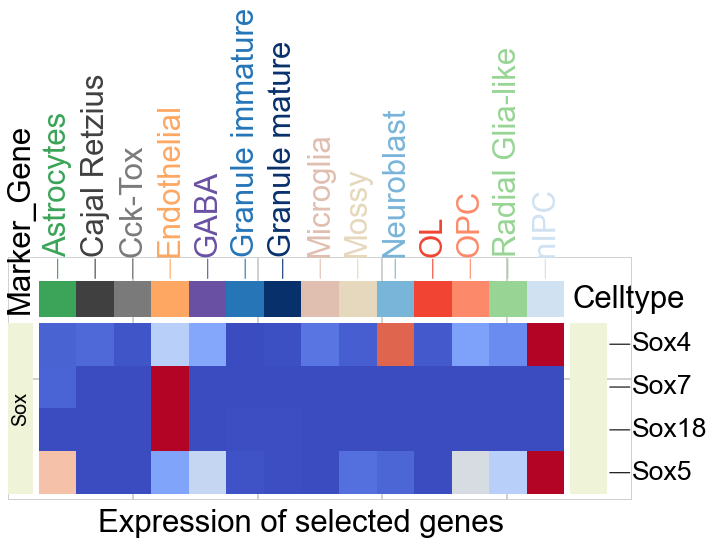

In [22]:
import pandas as pd
marker_genes_dict = {
    'Sox':['Sox4', 'Sox7', 'Sox18', 'Sox5'],
}

color_dict = {'Sox':'#EFF3D8',}

gene_color_dict = {}
gene_color_dict_black = {}
for cell_type, genes in marker_genes_dict.items():
    cell_type_color = color_dict.get(cell_type)
    for gene in genes:
        gene_color_dict[gene] = cell_type_color
        gene_color_dict_black[gene] = '#000000'

cm = ov.pl.complexheatmap(adata,
                       groupby ='clusters',
                       figsize =(5,2),
                       layer = None,
                       use_raw = False,
                       standard_scale = 'var',
                       col_color_bars = dict(zip(pd.Categorical(adata.obs['clusters']).categories, adata.uns['clusters_colors'])),
                       col_color_labels = dict(zip(pd.Categorical(adata.obs['clusters']).categories, adata.uns['clusters_colors'])),
                       left_color_bars = color_dict,
                       left_color_labels = None,
                       right_color_bars = color_dict,
                       right_color_labels = gene_color_dict_black,
                       marker_genes_dict = marker_genes_dict,
                       cmap = 'coolwarm', #parula,jet
                       legend_gap = 15,
                       legend_hpad = 0,
                       left_add_text = True,
                       col_split_gap = 2,
                       row_split_gap = 1,
                       col_height = 6,
                       left_height = 4,
                       right_height = 6,
                       col_split = None,
                       row_cluster = False,
                       col_cluster = False,
                       value_name='Gene',
                       xlabel = "Expression of selected genes",
                       label = 'Gene Expression',
                       save = True,
                       show = False,
                       legend = False,
                       plot_legend = False,
                      #save_pathway = "complexheatmap.png",
                            )

## Marker gene plot

In single-cell analysis, a marker gene heatmap is a powerful visualization tool that helps researchers to understand the expression patterns of specific marker genes across different cell populations. Here we provide `ov.pl.marker_heatmap` for visualizing the patterns of marker genes.

We first preprocess the data and define the dictionary of cell type and marker gene.
**Please ensure that each gene in the dictionary appears only once** (i.e. different cells cannot have the same marker gene, otherwise an error will be reported).

In [23]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,)

marker_genes_dict = {'Granule immature': ['Sepw1', 'Camk2b', 'Cnih2'],
 'Radial Glia-like': ['Dbi', 'Fabp7', 'Aldoc'],
 'Granule mature': ['Malat1', 'Rasl10a', 'Ppp3ca'],
 'Neuroblast': ['Igfbpl1', 'Tubb2b', 'Tubb5'],
 'Microglia': ['Lgmn', 'C1qa', 'C1qb'],
 'Cajal Retzius': ['Diablo', 'Ramp1', 'Stmn1'],
 'OPC': ['Olig1', 'C1ql1', 'Pllp'],
 'Cck-Tox': ['Tshz2', 'Cck', 'Nap1l5'],
 'GABA': ['Gad2', 'Gad1', 'Snhg11'],
 'Endothelial': ['Sparc', 'Myl12a', 'Itm2a'],
 'Astrocytes': ['Apoe',  'Atp1a2'],
 'OL': ['Plp1', 'Mog', 'Mag'],
 'Mossy': ['Arhgdig', 'Camk4'],
 'nIPC': ['Hmgn2', 'Ptma', 'H2afz']}

Begin robust gene identification
After filtration, 13264/13913 genes are kept.     Among 13264 genes, 13189 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
['Hba-a1', 'Malat1', 'Ptgds', 'Hbb-bt']
    finished (0:00:00)
extracting highly variable genes


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 0.8948171138763428 seconds.
End of size normalization: shiftlog and HVGs selection pearson


**Function**: `ov.pl.marker_heatmap`: 
 
- adata: AnnData object
        Annotated data matrix.
- marker_genes_dict: dict
        A dictionary containing the marker genes for each cell type.
- groupby: str
        The key in adata.obs that will be used for grouping the cells.
- color_map: str
        The color map to use for the value of heatmap.
- use_raw: bool
        Whether to use the raw data of AnnDta object for plotting.
- standard_scale: str
        The standard scale for the heatmap.
- expression_cutoff: float
        The cutoff value for the expression of genes.
- bbox_to_anchor: tuple
        The position of the legend bbox (x, y) in axes coordinates.
- figsize: tuple
        The size of the plot figure in inches (width, height).
- spines: bool
        Whether to show the spines of the plot.
- fontsize: int
        The font size of the text in the plot.
- show_rownames: bool
        Whether to show the row names in the heatmap.
- show_colnames: bool
        Whether to show the column names in the heatmap.
- save_pathway: str 
        The file path for saving the plot.
- ax: matplotlib.axes.Axes
        A pre-existing axes object for plotting (optional).

PyComplexHeatmap have been install version: 1.7.6
Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 134.1850723767916
Plotting legends..
Estimated legend width: 62.61944444444445 mm


(<Figure size 680x320 with 37 Axes>, <AxesSubplot: >)

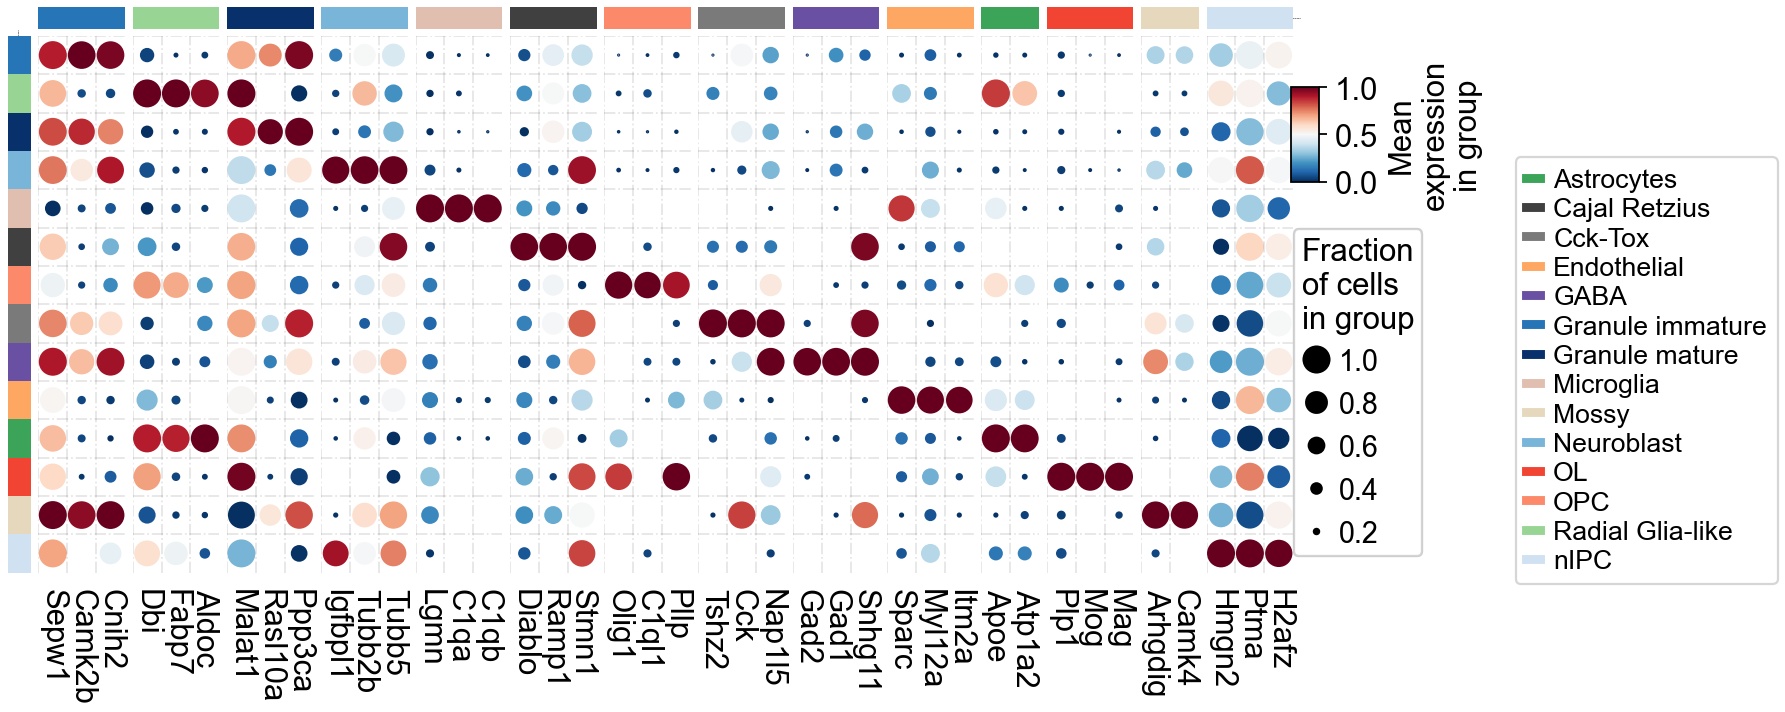

In [24]:
ov.pl.marker_heatmap(
    adata,
    marker_genes_dict,
    groupby='clusters',
    color_map="RdBu_r",
    use_raw=False,
    standard_scale="var",
    expression_cutoff=0.0,
    fontsize=12,
    bbox_to_anchor=(7, -2),
    figsize=(8.5,4),
    spines=False,
    show_rownames=False,
    show_colnames=True,
)